In [1]:

#%%
import numpy as np
import pandas as pd
import os
import re # for regular expressions
import seaborn as sns #for graph in correlation heatmap
import matplotlib.pyplot as plt

C:\Users\Tim\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Set directory
os.chdir("C:/Users/Tim/Documents/GitHub/Master-Thesis/Baublatt Info")

def directory_maker(x):
    x_changed = os.path.normpath(x)
    x_final = os.path.join(os.getcwd(), x_changed)
    return x_final

def read_baublatt_pd(x):
    data = pd.read_csv(directory_maker(x),sep=';', na_filter=False, encoding='latin-1')
    return data

#%% Load the Data
#Files
path_2006_01 =  "Baublatt_data/2006_01_KOF_9943D2K.csv"
path_2006_01c = "Baublatt_data/KOF_9943D2K_2006_01_bereinigt.csv"
path_2007_01 =  "Baublatt_data/KOF_9943D2K_2007_01.csv"
path_2007_01c = "Baublatt_data/KOF_9943D2K_2007_01_bereinigt.csv"

BP_2006_01 = read_baublatt_pd(path_2006_01)

BP_2006_01c= read_baublatt_pd(path_2006_01c)

BP_2007_01 = read_baublatt_pd(path_2007_01)

BP_2007_01c = read_baublatt_pd(path_2007_01c)

In [4]:
#all vars needed
var_keep = ['ObjektNr',"Baustelle","BaustPlz", "BaustOrt","BausKanton",
            "BezirkCode","BaustSprache", "BezirkName",'Kurzbeschreibung',
            'BauartCode','Baubeginn','Bauende','GesuchVom','BewilligtAm',
             'BaukostenVon','BaukostenBis','AnzGeb','AnzWhg','AnzEtagen']

#vars added from the uncleaned data set RAW
var_needed = ['ObjektNr',"Baustelle","BaustPlz", "BaustOrt","BezirkCode",
            "BezirkName","BaustSprache"]

#vars needed from ALL
var_project_type = ["BauartCode", "AnzEtagen", "BaukostenBis", "AnzWhg", "AnzGeb"]

#vars needed from ALL
var_adress  = ['ObjektNr',"Baustelle","BaustPlz", "BaustOrt","BezirkCode",
            "BezirkName","BaustKanton","BaustSprache"]

In [5]:
#%%
#Create a bigger dataframe
df2006 = pd.merge(BP_2006_01c,BP_2006_01[var_needed],on='ObjektNr', how='left')
df2007 = pd.merge(BP_2007_01c,BP_2007_01[var_needed],on='ObjektNr', how='left')

#bring the data together
df = pd.concat([df2006,df2007], axis = 0)

#get only adress frame
adr_df = df[var_adress + var_project_type ]

#%%
list(df)
#%%

['ObjektNr',
 'BaustKanton',
 'Kurzbeschreibung',
 'BauartCode',
 'Baubeginn',
 'Bauende',
 'GesuchVom',
 'BewilligtAm',
 'BaukostenVon',
 'BaukostenBis',
 'AnzGeb',
 'AnzWhg',
 'AnzEtagen',
 'AnzUG',
 'AnzPP',
 'CRBCode01',
 'CRBCode02',
 'CRBCode03',
 'CRBCode04',
 'CRBCode05',
 'CRBCode06',
 'CRBCode07',
 'CRBCode08',
 'CRBCode09',
 'CRBCode10',
 'Baustelle',
 'BaustPlz',
 'BaustOrt',
 'BezirkCode',
 'BezirkName',
 'BaustSprache']

C:\Users\Tim\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


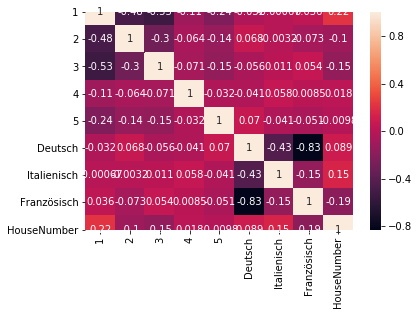

In [6]:
# 3.1 generate correlations between the housing type and if the map has house number

#3.2 get House number with Regex -> extract
"""Work here again on this number"""
HouseNumber = df.Baustelle.str.extract("[^ ]* (.*)")

#3.3 define the Columns als binary with House Number
df.HasHouseNumber = HouseNumber.isnull()

#3.4 get ratio of non-house number
HouseNumber.isna().sum()/len(HouseNumber)

#3.5 Decode the variable "BauartCode"
BauartCode_vec = df.BauartCode
BauartCode_ohe = pd.get_dummies(BauartCode_vec)

#Add Language
BaustSprache = pd.get_dummies(df.BaustSprache)

#Add Columns
BauartCode_ohe["Deutsch"] = BaustSprache.D
BauartCode_ohe["Italienisch"] = BaustSprache.I
BauartCode_ohe["Französisch"] = BaustSprache.F
BauartCode_ohe["HouseNumber"] = df.HasHouseNumber

#get heatmap
corr_Matrix = BauartCode_ohe.corr()
sns.heatmap(corr_Matrix, annot=True)
plt.show()

In [8]:
# define function which looks up if number is included in the the string
def hasNumbers(inputString):
return any(char.isdigit() for char in inputString)

0             Hünerwadelgasse
1             Hünerwadelgasse
2             Muhenstrasse 13
3                     Nellweg
4            Unterdorfstrasse
                ...          
7566       Goldauerstrasse 17
7567    Goldauerstrasse 30/36
7568          Letzistrasse 15
7569         Rotachstrasse 33
7570      Hottingerstrasse 10
Name: Baustelle, Length: 15209, dtype: object

In [10]:
any(df.Baustelle.values[1])

True

'Zelgliackerstrasse 177'

In [22]:
#This is my condition if adress has number included or not

bool(re.search(r'\d', df.Baustelle.values[55]))

True

In [46]:
"""
Input is Pandas Dataframe Columns 

Output is Numpy
    1 = Has House Number Included and 
    0 = Has no Housenumber included"""

def hasNumbers(input_pandas): #needs to be one column
    
    Numbers = np.zeros(len(input_pandas))
    
    for i in np.arange(len(input_pandas)):
        
        #check if there is a number in the Adress. True = Match = 1
        Numbers[i] = bool(re.search(r'\d', input_pandas.values[i]))
    return Numbers
        

In [50]:
hasNumbers(df.Baustelle)  #54% Haben numbers included

array([0., 0., 1., ..., 1., 1., 1.])

In [57]:
is_true = hasNumbers(df.Baustelle)

array([False, False,  True, ...,  True,  True,  True])

In [27]:
# Define function which just counts the amount of data
# Plus Count the numbers of the Has Numbers Array, in order to get further information

#1. Get the unique values of Column_i
#2. Count to numbers for each column
    #2.1 Count how often value 0 appears
    #2.2 Count Hof often value 1 appears
    
#This is no loop, this is length of i.loc

matrix([[4, 1]])

In [146]:
# defines the length of a given datafram 
# input 1 = dataframe


#choose dataframe, unique values of frame
frame = np.zeros([5,len(pd.unique(df.BauartCode))])

for i in np.arange(len(pd.unique(df.BauartCode))):
    
    frame[0,i] = len(df.loc[(df.BauartCode == pd.unique(df.BauartCode)[i])])
    frame[1,i] = len(df.loc[(df.BauartCode == pd.unique(df.BauartCode)[i])  & (is_true ==1)])
    frame[2,i] = len(df.loc[(df.BauartCode == pd.unique(df.BauartCode)[i])  & (is_true ==0)])
    frame[3,i] = round(frame[1,i]/frame[0,i],2)
    frame[4,i] = round(frame[0,i] / len(df),2)
    
    
pd.DataFrame(data=frame,index = ["Total","Has House Number","No House Number","Percentage Has Number", "Percentage of Tot"], columns=pd.unique(df.BauartCode)) 
   






,5,1,3,2,4
Total,962.00,6950.00,3789.00,3283.00,225.00
Has House Number,593.00,2654.00,2604.00,2279.00,105.00
No House Number,369.00,4296.00,1185.00,1004.00,120.00
Percentage Has Number,0.62,0.38,0.69,0.69,0.47
Percentage of Tot,0.06,0.46,0.25,0.22,0.01


In [162]:
"""
Input is (Dataframe, dataframe Col1, Datafarem Loaction)
Important: the last input checks if it has a number inside
thus we look whats going on there"""

def House_Number_Matrix(df, dfcol1, dfcol2):
    
    #Bauart =col1
    #choose dataframe, unique values of frame
    frame = np.zeros([5,len(pd.unique(dfcol1))])
      
    for i in np.arange(len(pd.unique(dfcol1))):
    
        frame[0,i] = len(df.loc[(dfcol1 == pd.unique(dfcol1)[i])])
        frame[1,i] = len(df.loc[(dfcol1 == pd.unique(dfcol1)[i])  & (hasNumbers(dfcol2) ==1)])
        frame[2,i] = len(df.loc[(dfcol1 == pd.unique(dfcol1)[i])  & (hasNumbers(dfcol2) ==0)])
        frame[3,i] = round(frame[1,i]/frame[0,i],2)
        
        frame[4,i] = round(frame[0,i] / len(df),2)

    return pd.DataFrame(data=frame,index = ["Total","Has House Number","No House Number","Percentage Has Number", "Percentage of Tot"], columns=pd.unique(dfcol1)) 



In [161]:
len(pd.unique(df.BaustSprache))

3

In [167]:
yyy = House_Number_Matrix(df, df.BauartCode, df.Baustelle)
yyy

,5,1,3,2,4
Total,962.00,6950.00,3789.00,3283.00,225.00
Has House Number,593.00,2654.00,2604.00,2279.00,105.00
No House Number,369.00,4296.00,1185.00,1004.00,120.00
Percentage Has Number,0.62,0.38,0.69,0.69,0.47
Percentage of Tot,0.06,0.46,0.25,0.22,0.01


In [159]:
np.zeros([5,len(pd.unique(df.BaustSprache))])

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [155]:
list(df)

['ObjektNr',
 'BaustKanton',
 'Kurzbeschreibung',
 'BauartCode',
 'Baubeginn',
 'Bauende',
 'GesuchVom',
 'BewilligtAm',
 'BaukostenVon',
 'BaukostenBis',
 'AnzGeb',
 'AnzWhg',
 'AnzEtagen',
 'AnzUG',
 'AnzPP',
 'CRBCode01',
 'CRBCode02',
 'CRBCode03',
 'CRBCode04',
 'CRBCode05',
 'CRBCode06',
 'CRBCode07',
 'CRBCode08',
 'CRBCode09',
 'CRBCode10',
 'Baustelle',
 'BaustPlz',
 'BaustOrt',
 'BezirkCode',
 'BezirkName',
 'BaustSprache']

In [115]:
frame

array([[ 593., 2654., 2604., 2279.,  105.],
       [ 369., 4296., 1185., 1004.,  120.]])

In [111]:
frame[0,:]

array([0., 0., 0., 0., 0.])

In [94]:
pd.unique(df.BauartCode)

array([5, 1, 3, 2, 4], dtype=int64)

In [65]:
df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

['ObjektNr',
 'BaustKanton',
 'Kurzbeschreibung',
 'BauartCode',
 'Baubeginn',
 'Bauende',
 'GesuchVom',
 'BewilligtAm',
 'BaukostenVon',
 'BaukostenBis',
 'AnzGeb',
 'AnzWhg',
 'AnzEtagen',
 'AnzUG',
 'AnzPP',
 'CRBCode01',
 'CRBCode02',
 'CRBCode03',
 'CRBCode04',
 'CRBCode05',
 'CRBCode06',
 'CRBCode07',
 'CRBCode08',
 'CRBCode09',
 'CRBCode10',
 'Baustelle',
 'BaustPlz',
 'BaustOrt',
 'BezirkCode',
 'BezirkName',
 'BaustSprache']